In [3]:
import scipy
import logging
import atlite
import numpy as np
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from init import *

In [5]:
# this is not really needed if we have a complete solution and concat script is executed

import glob
fnames = glob.glob(str(INTERIM_DIR / "network_solution"  / "*.nc"))
solution = xr.open_mfdataset(fnames)

In [7]:
solution = solution.load()

In [101]:
# solution = xr.open_dataset(OUTPUT_DIR / "network_solution" / "network_solution.nc")

In [8]:
solution

<xarray.Dataset>
Dimensions:                          (x: 60, y: 60)
Coordinates:
  * x                                (x) float64 5.0 5.25 5.5 ... 19.5 19.75
  * y                                (y) float64 50.0 50.25 50.5 ... 64.5 64.75
Data variables:
    runtime                          (x, y) float64 115.0 182.3 ... 62.32 51.25
    runtime_solver                   (x, y) float64 109.8 173.4 ... 57.58 46.44
    size_solar_pv                    (x, y) float64 1.627 1.424 ... 1.836 1.977
    size_wind                        (x, y) float64 0.2561 0.3618 ... 0.3831
    size_storage_electricity         (x, y) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    size_storage_electrolizer        (x, y) float64 8.028e-05 ... 9.18e-05
    size_electrolizer                (x, y) float64 1.641e-05 ... 1.872e-05
    size_storage_co2                 (x, y) float64 0.009187 ... 0.001901
    size_co2                         (x, y) float64 4.441e-05 ... 5.454e-05
    size_storage_methanol_synthesis  (x, y) float64 999.8 999.9 ... 999.8 1e+03
    size_methanol_synthesis          (x, y) float64 1e+03 1e+03 ... 1e+03 1e+03

In [103]:
# this takes a while to run...
# mean_wind = wind.sel(x=solution.x, y=solution.y).mean(dim='time')['specific generation'].compute()

In [9]:
df = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

Text(0.5, 1.0, 'mean capacity factors for wind above 0.37')

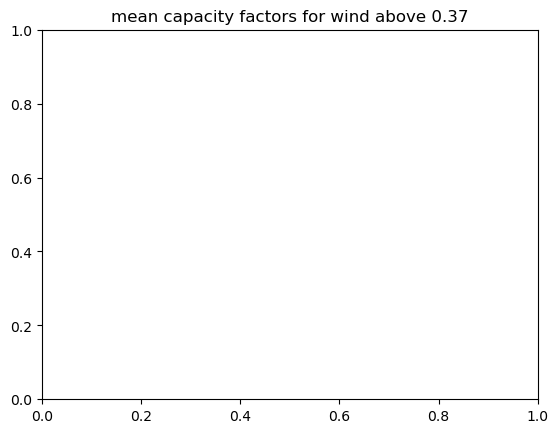

In [10]:
#mean_wind.where(mean_wind > 0.37).plot()
plt.title('mean capacity factors for wind above 0.37')

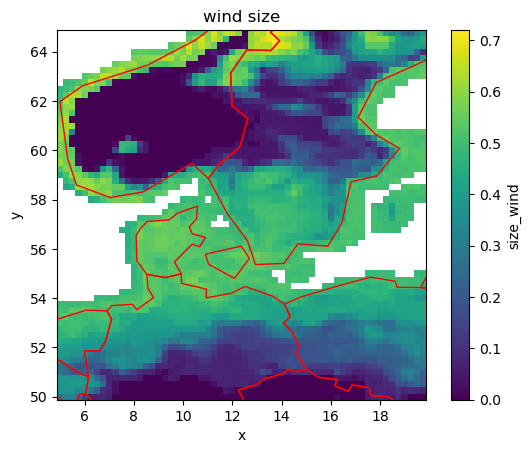

In [11]:
fig, ax = plt.subplots(1)

solution.size_wind.transpose('y', 'x').plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)
plt.title('wind size');

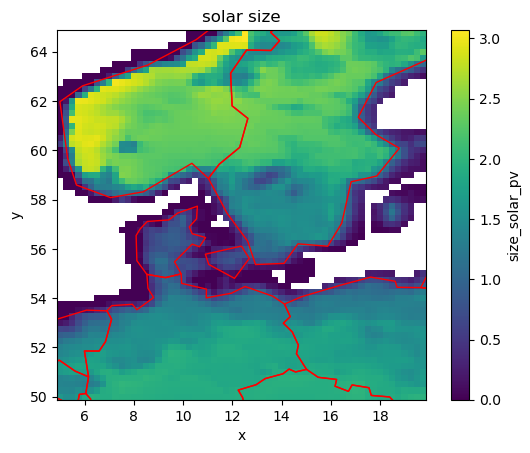

In [14]:
fig, ax = plt.subplots(1)

solution.size_solar_pv.transpose('y', 'x').plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)
plt.title('solar size');



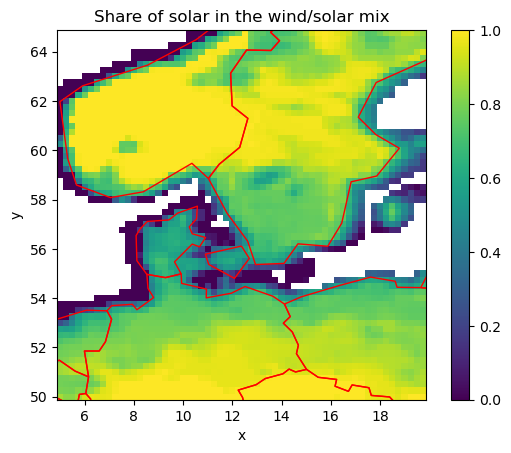

In [15]:
fig, ax = plt.subplots(1)
(solution.size_solar_pv / (solution.size_solar_pv + solution.size_wind)).transpose('y', 'x').plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)
plt.title('Share of solar in the wind/solar mix');

<Axes: xlabel='x', ylabel='y'>

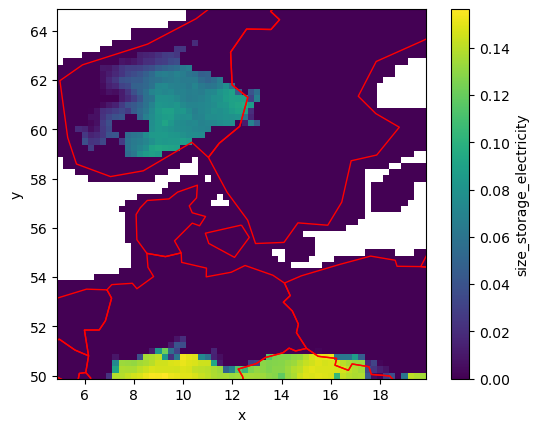

In [16]:
fig, ax = plt.subplots(1)
solution.size_storage_electricity.transpose('y', 'x').plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)

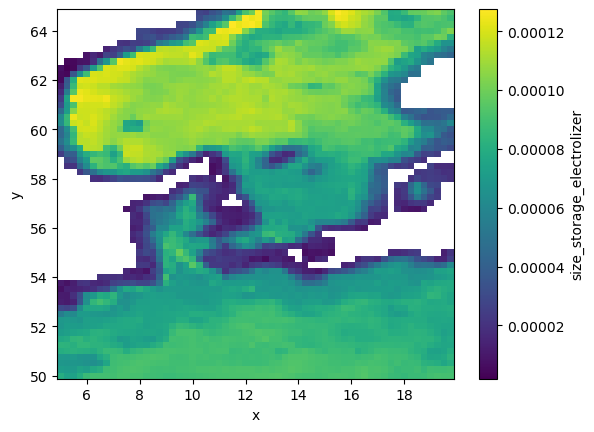

In [17]:
solution.size_storage_electrolizer.transpose('y', 'x').plot()

In [18]:
solution.runtime_solver.min().compute()

<xarray.DataArray 'runtime_solver' ()>
array(31.37)

<Axes: xlabel='x', ylabel='y'>

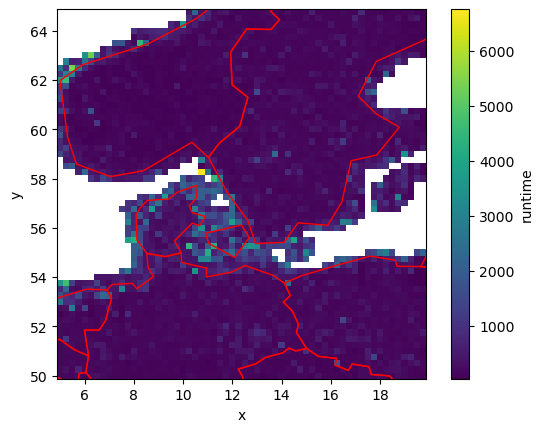

In [19]:
fig, ax = plt.subplots(1)
solution.runtime.transpose('y', 'x').plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)

<Axes: xlabel='x', ylabel='y'>

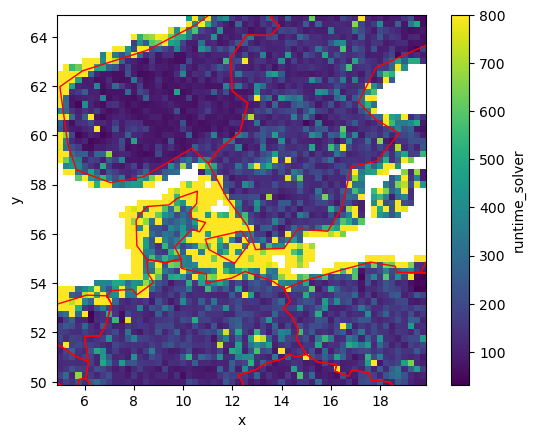

In [20]:
fig, ax = plt.subplots(1)
solution.runtime_solver.clip(max=800).transpose('y', 'x').plot(ax=ax)
df.plot(facecolor='None', edgecolor='red', ax=ax)

In [22]:
solution.runtime_solver.mean()

<xarray.DataArray 'runtime_solver' ()>
array(364.52057773)

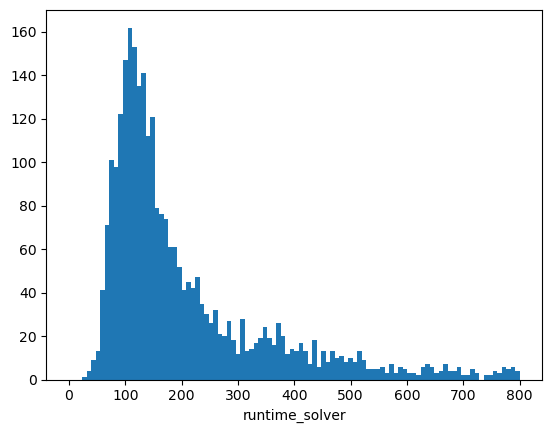

In [23]:
solution.runtime_solver.plot.hist(bins=100, range=(0, 800));

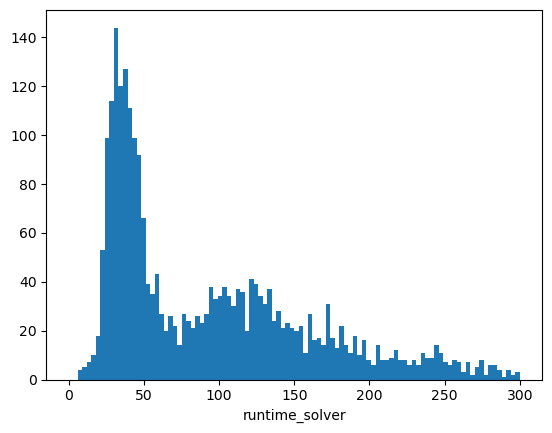

In [18]:
solution.runtime_solver.plot.hist(bins=100, range=(0, 300));

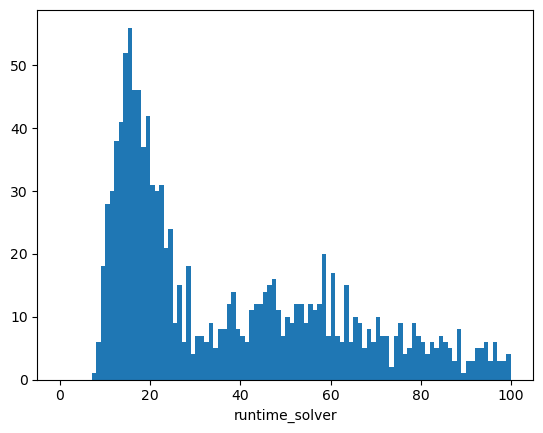

In [120]:
solution.runtime_solver.plot.hist(bins=100, range=(0, 100));

In [106]:
((solution.runtime - solution.runtime_solver)/solution.runtime).mean()

<xarray.DataArray ()>
array(0.1305075)

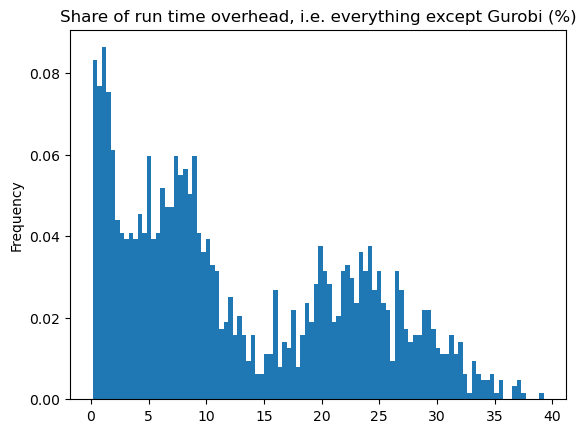

In [117]:
(100 * (solution.runtime - solution.runtime_solver)/solution.runtime).plot.hist(bins=100, density=True);
plt.ylabel('Frequency')
plt.xlabel('')
plt.title('Share of run time overhead, i.e. everything except Gurobi (%)');

[2023-07-18 09:50:37,790] DEBUG - matplotlib.colorbar: locator: <matplotlib.ticker.AutoLocator object at 0x7f6ab7058310>


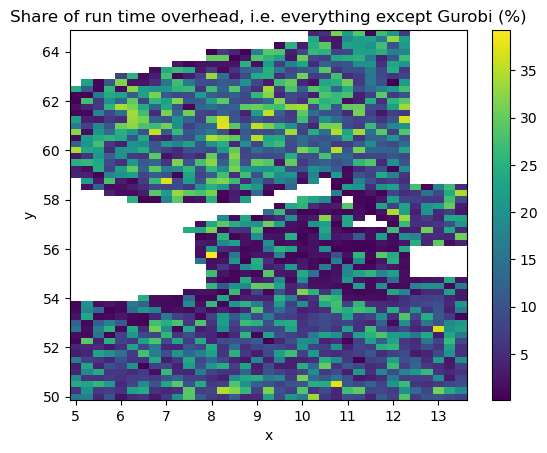

In [118]:
(100*(solution.runtime - solution.runtime_solver)/solution.runtime).transpose('y', 'x').plot()
plt.title('Share of run time overhead, i.e. everything except Gurobi (%)');

In [55]:
import os
os.environ['GRB_LICENSE_FILE'] = '/home/pregner/gurobi.lic'

# this does not work in jupyter notebook, needs to be set in kernel spec!
# see /home/pregner/micromamba/envs/syfop-global-costs/share/jupyter/kernels/python3/kernel.json
# os.environ['LD_LIBRARY_PATH'] = '/opt/gurobi1001/linux64/lib'